Objetivo de Negócio: Desenvolver um sistema de análise preditiva e inteligência de mercado para o setor automotivo, visando fornecer às revendas uma visão proativa das tendências e mudanças de comportamento do mercado, a fim de otimizar a gestão e maximizar os lucros das revendas.

O sistema utilizará algoritmos de aprendizado de máquina para analisar dados históricos e em tempo real, combinados com informações relevantes do mercado, como preferências dos consumidores, fatores econômicos, regulamentações e avanços tecnológicos no setor automotivo. A partir dessas análises, serão geradas previsões precisas e insights estratégicos que auxiliarão as revendas na tomada de decisões mais informadas e eficazes.

O objetivo principal é capacitar as revendas automotivas a antecipar-se às mudanças do mercado, ajustar seus estoques e preços de forma estratégica, identificar oportunidades de negócio e adotar abordagens de marketing mais eficientes. Isso resultará em uma gestão otimizada, minimizando riscos e maximizando os lucros das revendas, permitindo que elas se destaquem em um ambiente altamente competitivo e em constante evolução.

Análise explorátoria




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score
from sklearn.linear_model import LinearRegression ,ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv("carros.csv")

In [ ]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [ ]:
df2=pd.read_csv("fipe.csv")

In [ ]:
df2.head()

,Unnamed: 0,brand,vehicle,year_model,fuel,price_reference,price
0,1,Acura,Legend 3.2/3.5,1998,Gasoline,junho de 2018,"R$ 27.942,00"
1,2,Acura,Legend 3.2/3.5,1997,Gasoline,junho de 2018,"R$ 23.392,00"
2,3,Acura,Legend 3.2/3.5,1996,Gasoline,junho de 2018,"R$ 22.682,00"
3,4,Acura,Legend 3.2/3.5,1995,Gasoline,junho de 2018,"R$ 20.648,00"
4,5,Acura,Legend 3.2/3.5,1994,Gasoline,junho de 2018,"R$ 18.343,00"


In [ ]:
df3 = pd.read_csv('worldcars.csv')

In [ ]:
df3.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df3.shape

(301, 9)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df3.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
fuel_counts = df3['Fuel_Type'].value_counts()
seller_counts = df3['Seller_Type'].value_counts()
transmission_counts = df3['Transmission'].value_counts()

print(fuel_counts)
print(seller_counts)
print(transmission_counts)


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:

df3.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


df3.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

df3.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["price"].describe().round(2)

count      205.00
mean     13276.71
std       7988.85
min       5118.00
25%       7788.00
50%      10295.00
75%      16503.00
max      45400.00
Name: price, dtype: float64

In [ ]:
df.drop(columns="car_ID",inplace=True)

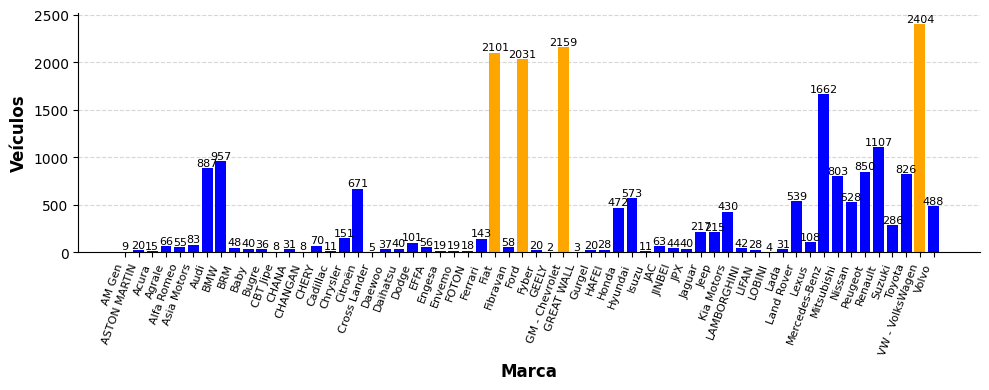

In [ ]:

brand_counts = df2.groupby('brand').size().reset_index(name='count')
brand_counts['flag'] = brand_counts['count'].apply(lambda x: 1 if x > 2000 else 0)

plt.figure(figsize=(10, 4))
bars = plt.bar(brand_counts['brand'], brand_counts['count'], color=brand_counts['flag'].map({0: 'blue', 1: 'orange'}))

plt.xlabel('Marca', fontsize=12, fontweight='bold')
plt.ylabel('Veículos', fontsize=12, fontweight='bold')
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='dashed', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom', fontsize=8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
frequencia = df['CarName'].value_counts()
item_mais_frequente = frequencia.idxmax()
print("O item mais frequente na coluna é:", item_mais_frequente)


O item mais frequente na coluna é: toyota corona


In [ ]:
frequencia2 = df['symboling'].value_counts()
item_mais_frequente = frequencia2.idxmax()
print("O item mais frequente na coluna é:", item_mais_frequente)


O item mais frequente na coluna é: 0


Text(0.5, 1.0, 'Combustível mais usado')

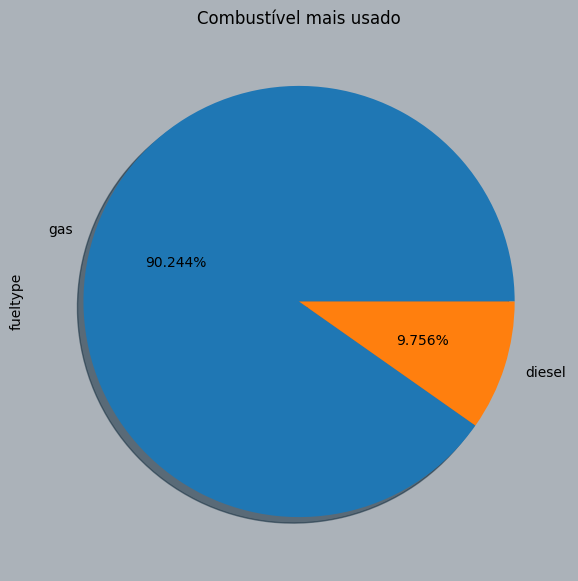

In [ ]:
#tipo de combustível mais usado

plt.figure(figsize = [7, 7], clear = True, facecolor = "#ABB2B9")
df["fueltype"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("Combustível mais usado")

In [ ]:
CP = df.groupby("fueltype")["price"].mean()
CP

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

<Axes: xlabel='fueltype'>

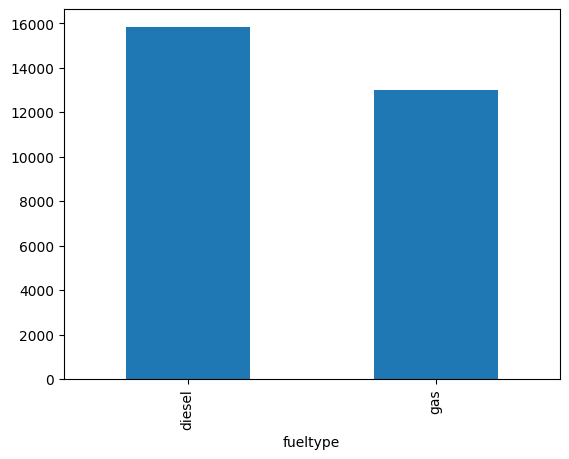

In [ ]:
# Criando um gráfifco de barras para visualizar a diferença
CP.plot(kind="bar")

Text(0.5, 1.0, 'motorização')

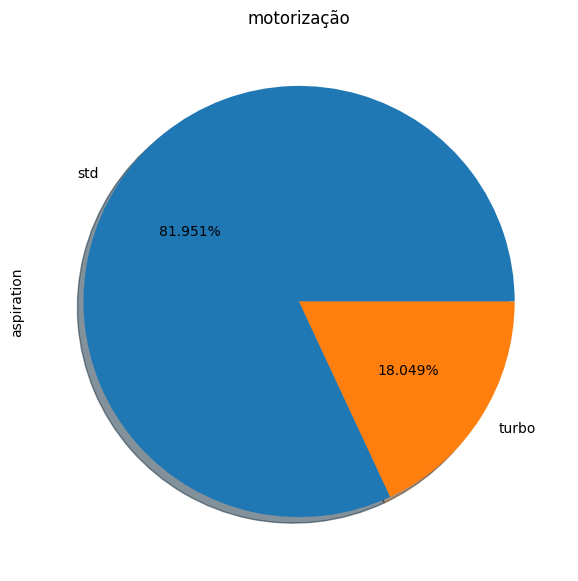

In [ ]:
# maioria das repetições de aspiração no conjunto de dados [carro padrão ou carro turbo]

plt.figure(figsize = [7, 7], clear = True, facecolor = "#ffffff")
df["aspiration"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("motorização")

In [ ]:
# O preço médio depende do Standard ou Turbo

SP = df.groupby("aspiration")["price"].mean()
SP

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64

<Axes: xlabel='aspiration'>

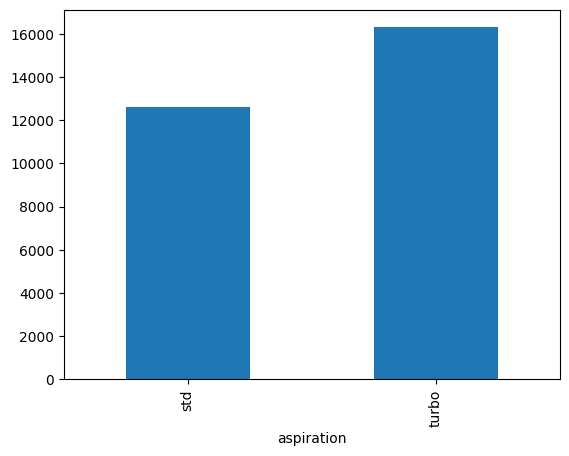

In [ ]:
#gráfico
SP.plot(kind="bar")

In [ ]:
# o preço médio depende do corpo do carro

DP = df.groupby("carbody")["price"].mean()
DP

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

In [ ]:
X = df3.drop(['Car_Name','Selling_Price'],axis=1)
Y = df3['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train,Y_train)

LinearRegression()

In [ ]:
treino = LR.predict(X_train)

In [ ]:
# R2
error_score = metrics.r2_score(Y_train, treino)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


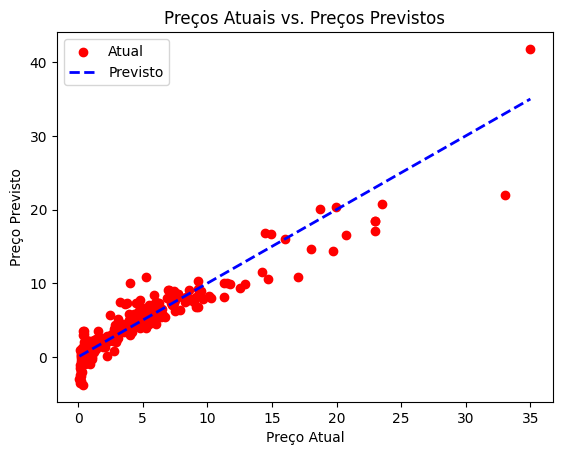

In [ ]:

# Definir cores personalizadas
cor_atual = "#FF0000"  # Vermelho
cor_predito = "#0000FF"  # Azul

# Scatter plot com cores personalizadas e estilo visual
plt.scatter(Y_train, treino, color=cor_atual, label="Atual")
plt.xlabel("Preço Atual")
plt.ylabel("Preço Previsto")
plt.title("Preços Atuais vs. Preços Previstos")

# Linha diagonal para referência
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color=cor_predito, linestyle='--', linewidth=2, label="Previsto")

# Personalizar legendas
plt.legend()

# Mostrar o gráfico
plt.show()


In [ ]:

teste = LR.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, teste)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715027051


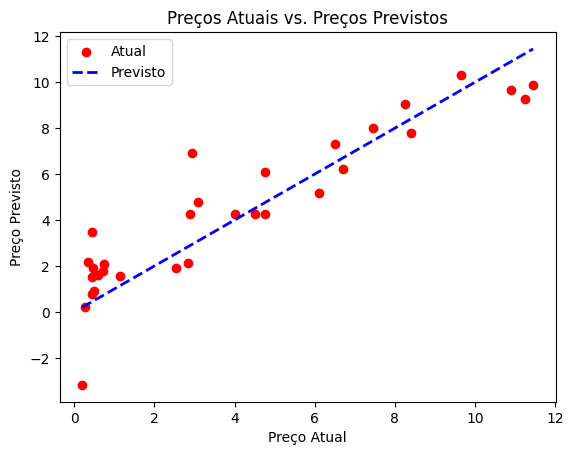

In [ ]:

# Definir cores personalizadas
cor_atual = "#FF0000"  # Verde
cor_predito = "#0000FF"  # Laranja

# Scatter plot com cores personalizadas e estilo visual
plt.scatter(Y_test, teste, color=cor_atual, label="Atual")
plt.xlabel("Preço Atual")
plt.ylabel("Preço Previsto")
plt.title("Preços Atuais vs. Preços Previstos")

# Linha diagonal para referência
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color=cor_predito, linestyle='--', linewidth=2, label="Previsto")

# Personalizar legendas
plt.legend()

# Mostrar o gráfico
plt.show()


In [ ]:
# copiando o orginal DataSet

new_df=df.copy()

# separando o tipo das columns [ object and numeric ]

cat = []
num = []
for i in new_df.columns:
    if new_df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data_n=new_df[num]   # new dataframe just type numeric
data_c=new_df[cat]  # new dataframe just type object

col=data_c.columns
col

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [ ]:
# organizando as colunas por categoria

label_encoders = {}
categorical_columns = data_c.columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])

# juntando os  datasets
frames = [data_c, data_n]

data1 = pd.concat(frames,axis=1)
data1.head()

In [ ]:
# Escolhendo essas colunas porque tem influencia no preço

data1=data1[["highwaympg","citympg","CarName",'enginelocation','fuelsystem','boreratio','wheelbase','drivewheel','carlength','carwidth','horsepower','curbweight','enginesize','price']]


In [ ]:
#Definido oobjetivo, e quebrando os dados para treino
X = data1.drop(columns="price")
y = data1["price"]    # y = price

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (143, 13)
X Test  :  (62, 13)
Y Train :  (143,)
Y Test  :  (62,)


In [ ]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()

In [ ]:
# fazendo loop de cada Regressao

li = [LR,DTR,RFR,KNR,]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Criação das instâncias dos modelos
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()

# Treinamento de cada modelo separadamente
LR.fit(X_train, y_train)
DTR.fit(X_train, y_train)
RFR.fit(X_train, y_train)
KNR.fit(X_train, y_train)

# Realização de previsões para cada modelo
ypred_LR = LR.predict(X_test)
ypred_DTR = DTR.predict(X_test)
ypred_RFR = RFR.predict(X_test)
ypred_KNR = KNR.predict(X_test)

# Avaliação do desempenho de cada modelo
r2_LR = r2_score(y_test, ypred_LR)
r2_DTR = r2_score(y_test, ypred_DTR)
r2_RFR = r2_score(y_test, ypred_RFR)
r2_KNR = r2_score(y_test, ypred_KNR)

# Armazenamento dos resultados em um dicionário
d = {
    'Linear Regression': r2_LR * 100,
    'Decision Tree': r2_DTR * 100,
    'Random Forest': r2_RFR * 100,
    'KNN': r2_KNR * 100
}

# Print the results
for model, r2 in d.items():
    print(f"{model}: R2 Score = {r2:.2f}")


Linear Regression: R2 Score = 85.24
Decision Tree: R2 Score = 86.26
Random Forest: R2 Score = 94.13
KNN: R2 Score = 76.12


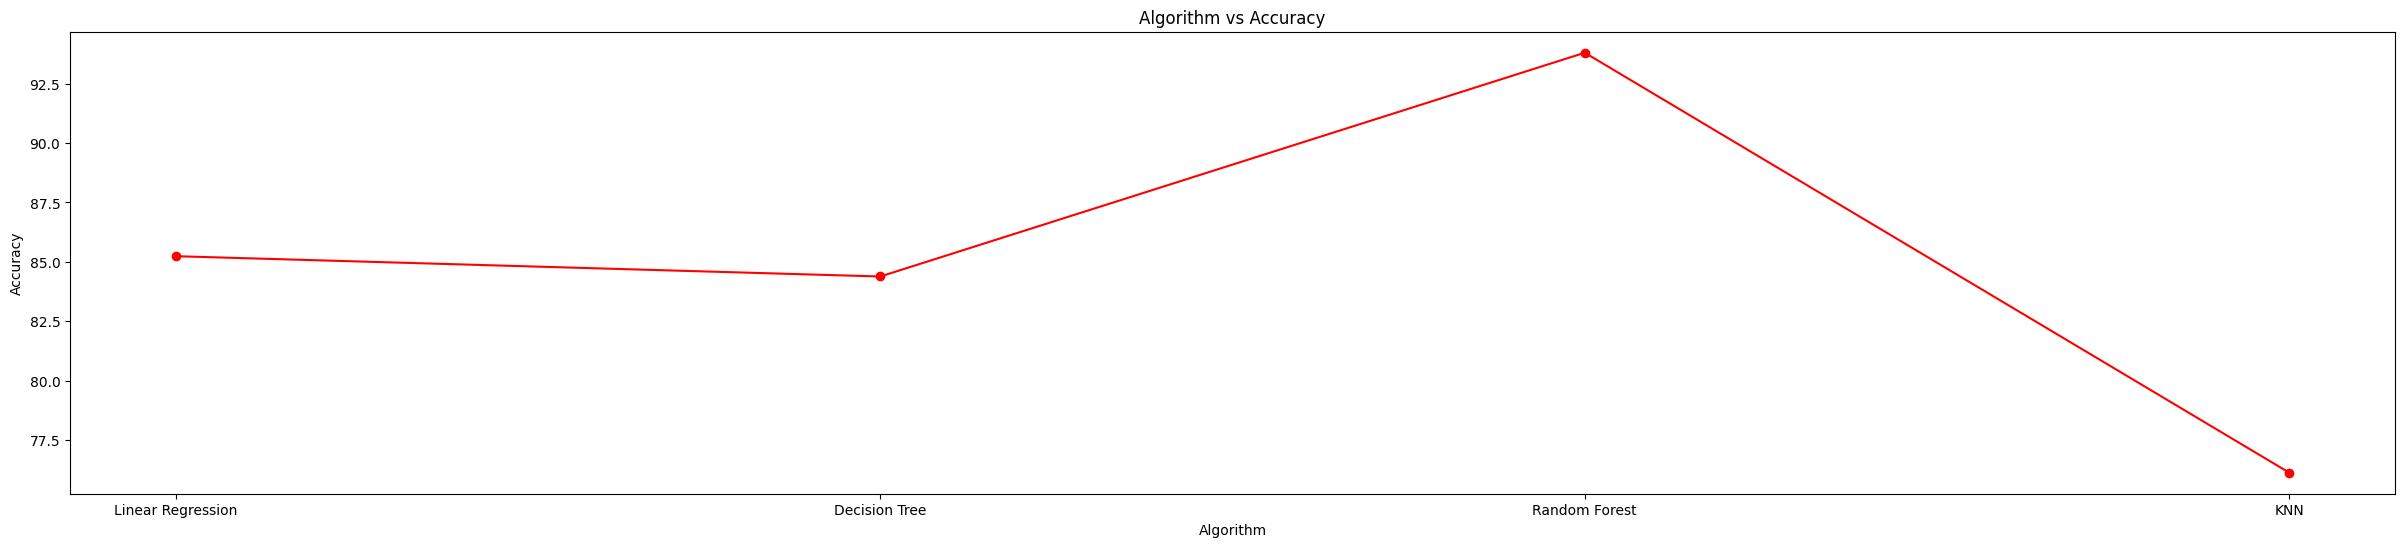

In [ ]:
# gráfico de acertividade de cada regressao

plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()

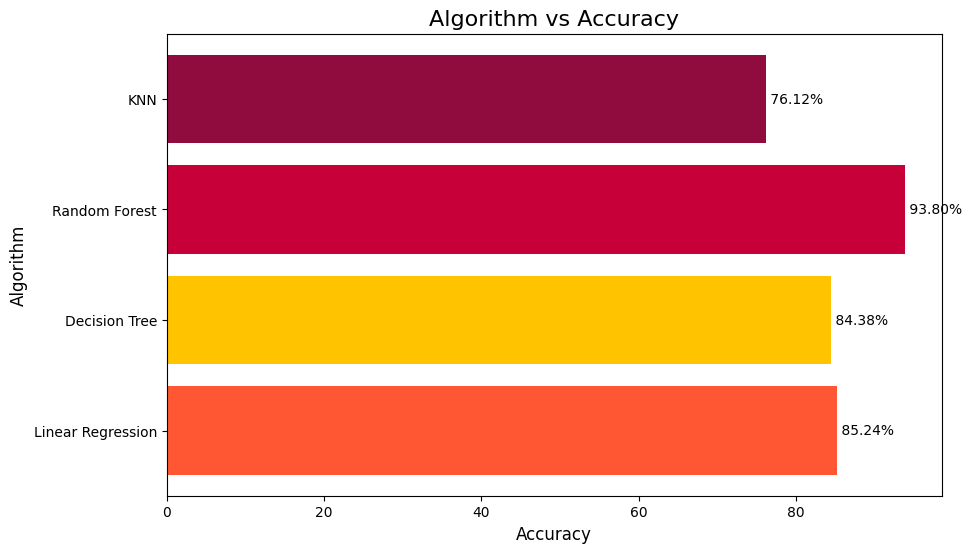

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Algorithm vs Accuracy", fontsize=16)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Algorithm", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

bar_colors = ['#FF5733', '#FFC300', '#C70039', '#900C3F']  # Cores personalizadas para as barras

# Plotar as barras horizontais
plt.barh(list(d.keys()), list(d.values()), color=bar_colors)

# Adicionar valores nas barras
for i, v in enumerate(list(d.values())):
    plt.text(v, i, f" {v:.2f}%", color='black', va='center', fontsize=10)

plt.show()


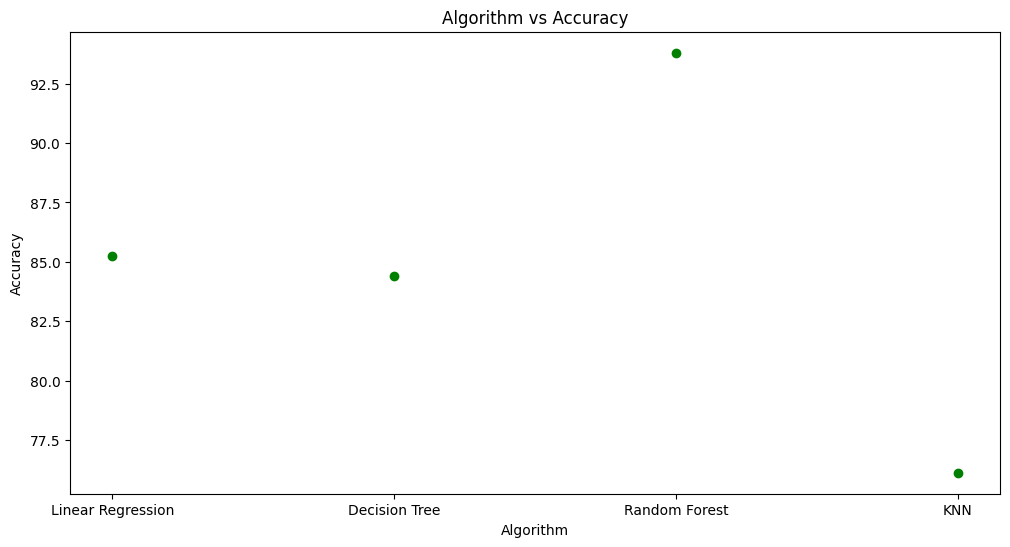

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.scatter(d.keys(), d.values(), color='green')
plt.show()


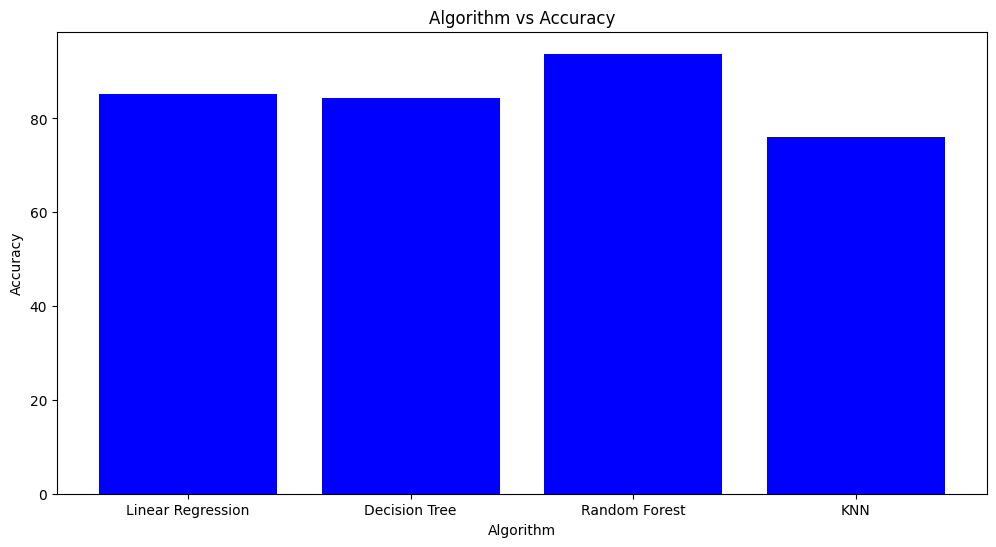

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.bar(d.keys(), d.values(), color='blue')
plt.show()